<a href="https://colab.research.google.com/github/ZenoZoldyck/Kaggle_competions/blob/main/Class_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
tf.__version__

'2.5.0'

In [3]:
train = pd.read_excel("/content/train.xlsx")
test = pd.read_csv("/content/test.csv")

In [5]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,1
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,0
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [6]:
train_data = train.drop(["target", "id"], axis = "columns")
train_label = train["target"]

In [7]:
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [8]:
train_label.head()

0    1
1    0
2    0
3    3
4    1
Name: target, dtype: int64

In [10]:
train_data = np.array(train_data)
train_label_1 = np.array(train_label)

In [25]:
train_label_1[2].shape

()

In [11]:
train_label = tf.one_hot(train_label_1, depth = 4, axis = -1)

In [12]:
train_data.shape, train_label.shape

((100000, 50), TensorShape([100000, 4]))

In [21]:
train_label[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 0., 0.], dtype=float32)>

In [29]:
X_train, y_train, X_test, y_test = train_data[:90000], train_label[:90000], train_data[90000:], train_label[90000:]

In [48]:
# time for model building
model_7 = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation = "relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation = "relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation = "relu"),
   tf.keras.layers.Dense(4, activation = "softmax")                          
])

model_7.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
history = model_7.fit(X_train, y_train, epochs = 75, validation_data = (X_test, y_test))

Epoch 1/75
2813/2813 [==============================] - 8s 3ms/step - loss: 0.1527 - accuracy: 0.5720 - val_loss: 0.1481 - val_accuracy: 0.5850
Epoch 2/75
2813/2813 [==============================] - 8s 3ms/step - loss: 0.1500 - accuracy: 0.5738 - val_loss: 0.1478 - val_accuracy: 0.5852
Epoch 3/75
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1495 - accuracy: 0.5739 - val_loss: 0.1470 - val_accuracy: 0.5856
Epoch 4/75
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1492 - accuracy: 0.5740 - val_loss: 0.1469 - val_accuracy: 0.5855
Epoch 5/75
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1489 - accuracy: 0.5744 - val_loss: 0.1467 - val_accuracy: 0.5849
Epoch 6/75
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1487 - accuracy: 0.5742 - val_loss: 0.1466 - val_accuracy: 0.5869
Epoch 7/75
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1485 - accuracy: 0.5748 - val_loss: 0.1465 - val_accuracy:

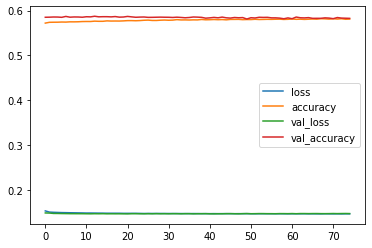

In [49]:
pd.DataFrame(history.history).plot()

In [39]:
test = pd.read_csv("/content/test.csv")

In [40]:
test = test.drop(["id"], axis = "columns")

In [41]:
test = np.array(test)

In [50]:
y_preds = model_6.predict(test)

In [51]:
y_preds[0]

array([0.12843923, 0.49565536, 0.30118546, 0.07471998], dtype=float32)

In [52]:
abc = pd.DataFrame(y_preds).to_csv("yahooo.csv")